In [54]:
# TODO:- 
# Re-type all and updates needed accordingly.
# Save the matplotlib plots.
# save the models

In [55]:
# Question :- 
# In this assignment candidate will be able to create a model that can detect coronavirus patients 
# from X-ray reports

# Just info:-
# I have already download and unzip the kaggle dataset. It's name is Covid19-dataset.

In [56]:
# Importing all the necessary libraries

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, Input
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense # For model layers of CNN

In [57]:
train_dir = "C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/train"
test_dir = "C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/test"

In [58]:
print(train_dir)

C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/train


In [59]:
print(test_dir)

C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/test


In [60]:
os.listdir(train_dir)

['Covid', 'Normal', 'Viral Pneumonia']

In [61]:
x_train = []
for folder in os.listdir(train_dir):
    sub_path = train_dir + '/' + folder
    for image in os.listdir(sub_path):
        img_path = sub_path + '/' + image
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224,224)) # Resnet-50 needs an input of shape 224x224
        x_train.append(img)

In [62]:
x_train

[array([[[ 9,  9,  9],
         [ 7,  7,  7],
         [ 6,  6,  6],
         ...,
         [ 7,  7,  7],
         [ 8,  8,  8],
         [13, 13, 13]],
 
        [[ 7,  7,  7],
         [ 8,  8,  8],
         [ 4,  4,  4],
         ...,
         [ 2,  2,  2],
         [ 7,  7,  7],
         [ 9,  9,  9]],
 
        [[ 7,  7,  7],
         [ 5,  5,  5],
         [ 3,  3,  3],
         ...,
         [ 5,  5,  5],
         [ 6,  6,  6],
         [ 7,  7,  7]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 4,  4,  4],
         [ 0,  0,  0],
         ...,
         [ 5,  5,  5],
         [ 5,  5,  5],
         [ 7,  7,  7]],
 
        [[ 0,  0,  0],
         [ 1,  1,  1],
         [ 0,  0,  0],
         ...,
         [ 5,  5,  5],
         [ 5,  5,  5],
         [ 6,  6,  6]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 1,  1,  1],
         ...,
         [ 8,  8,  8],
         [ 8,  8,  8],
         [ 8,  8,  8]]], dtype=uint8),
 array([[[ 48,  48,  48],
         [ 49,  

In [63]:
len(x_train)

251

In [64]:
# Total number of images in all the directories:- 
111 + 70 + 70

251

In [65]:
x_test = []
for folder in os.listdir(test_dir):
    sub_test = test_dir + '/' + folder
    for image in os.listdir(sub_test):
        img_test = sub_test + '/' + image
        imgtest = cv2.imread(img_test)
        imgtest = cv2.resize(imgtest,(224,224))
        x_test.append(imgtest)

In [66]:
len(x_test)

66

In [67]:
26 + 20 + 20

66

In [68]:
print("Maximum value of the first image in x_train", float(np.max(x_train[0])))
print("Minimum value of the first image in x_train", float(np.min(x_train[0])))

print("Maximum value of the first image in x_test", float(np.max(x_test[0])))
print("Minimum value of the first image in x_test", float(np.min(x_test[0])))


Maximum value of the first image in x_train 255.0
Minimum value of the first image in x_train 0.0
Maximum value of the first image in x_test 255.0
Minimum value of the first image in x_test 0.0


In [69]:
# Preprocessing the x_train and x_test

train = np.array(x_train) / 255.0
test = np.array(x_test) / 255.0

In [70]:
print(train)

[[[[0.03529412 0.03529412 0.03529412]
   [0.02745098 0.02745098 0.02745098]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.02745098 0.02745098 0.02745098]
   [0.03137255 0.03137255 0.03137255]
   [0.05098039 0.05098039 0.05098039]]

  [[0.02745098 0.02745098 0.02745098]
   [0.03137255 0.03137255 0.03137255]
   [0.01568627 0.01568627 0.01568627]
   ...
   [0.00784314 0.00784314 0.00784314]
   [0.02745098 0.02745098 0.02745098]
   [0.03529412 0.03529412 0.03529412]]

  [[0.02745098 0.02745098 0.02745098]
   [0.01960784 0.01960784 0.01960784]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.01960784 0.01960784 0.01960784]
   [0.02352941 0.02352941 0.02352941]
   [0.02745098 0.02745098 0.02745098]]

  ...

  [[0.         0.         0.        ]
   [0.01568627 0.01568627 0.01568627]
   [0.         0.         0.        ]
   ...
   [0.01960784 0.01960784 0.01960784]
   [0.01960784 0.01960784 0.01960784]
   [0.02745098 0.02745098 0.02745098]]

  [[0.         0.         0.        ]
   [0.0

In [71]:
print(train.shape)

(251, 224, 224, 3)


In [72]:
print(test.shape)

(66, 224, 224, 3)


In [73]:
# But why there is a need for ImageDataGenerator? is the images are less. yes!

train_data = ImageDataGenerator(rescale = 1/255.0 , validation_split=0.2)
test_data = ImageDataGenerator(rescale = 1/255.0)

In [74]:
train_set = train_data.flow_from_directory(
                    train_dir,
                    subset = 'training',
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'categorical' # sparse
)
val_set = train_data.flow_from_directory(
                    train_dir,
                    subset = 'validation',
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'categorical' # sparse
)
test_set = test_data.flow_from_directory(
                    test_dir,
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'categorical' # sparse
)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [75]:
print(train_set.class_indices)
print(test_set.class_indices)
print(val_set.class_indices)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


In [76]:
y_train = train_set.classes 
y_val = val_set.classes
y_test = test_set.classes 

print("y_train :-", y_train)
print("y_val :- ", y_val)
print("y_test :- ", y_test)

y_train :- [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
y_val :-  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
y_test :-  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [77]:
from keras.utils import to_categorical

# Convert class labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes= 3)
y_val_one_hot = to_categorical(y_val, num_classes = 3)
y_test_one_hot = to_categorical(y_test, num_classes = 3)


In [78]:
print(y_train_one_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [79]:
print(y_train_one_hot.shape)

(201, 3)


In [80]:
print('train data shape : ' , train.shape) # (Total number of images, height, width, colour channel)
print('test data shape : ' , test.shape)

train data shape :  (251, 224, 224, 3)
test data shape :  (66, 224, 224, 3)


In [81]:
# plt.figure(figsize=(16,16))
# for i in range(8):
#     plt.subplot(2,4,i+1)
#     plt.imshow(train[i])
#     plt.title(y_train[i])


# Visualization of data


# plt.figure(figsize = (15, 15))
# for i in range(0, 25, 1):
#     plt.xticks([])
#     plt.yticks([])
#     plt.subplot(5, 5, i + 1)
#     plt.imshow(train[i], cmap = "gray")
#     plt.xlabel(y_train[i], fontsize = 20)

# plt.tight_layout()
# plt.show()

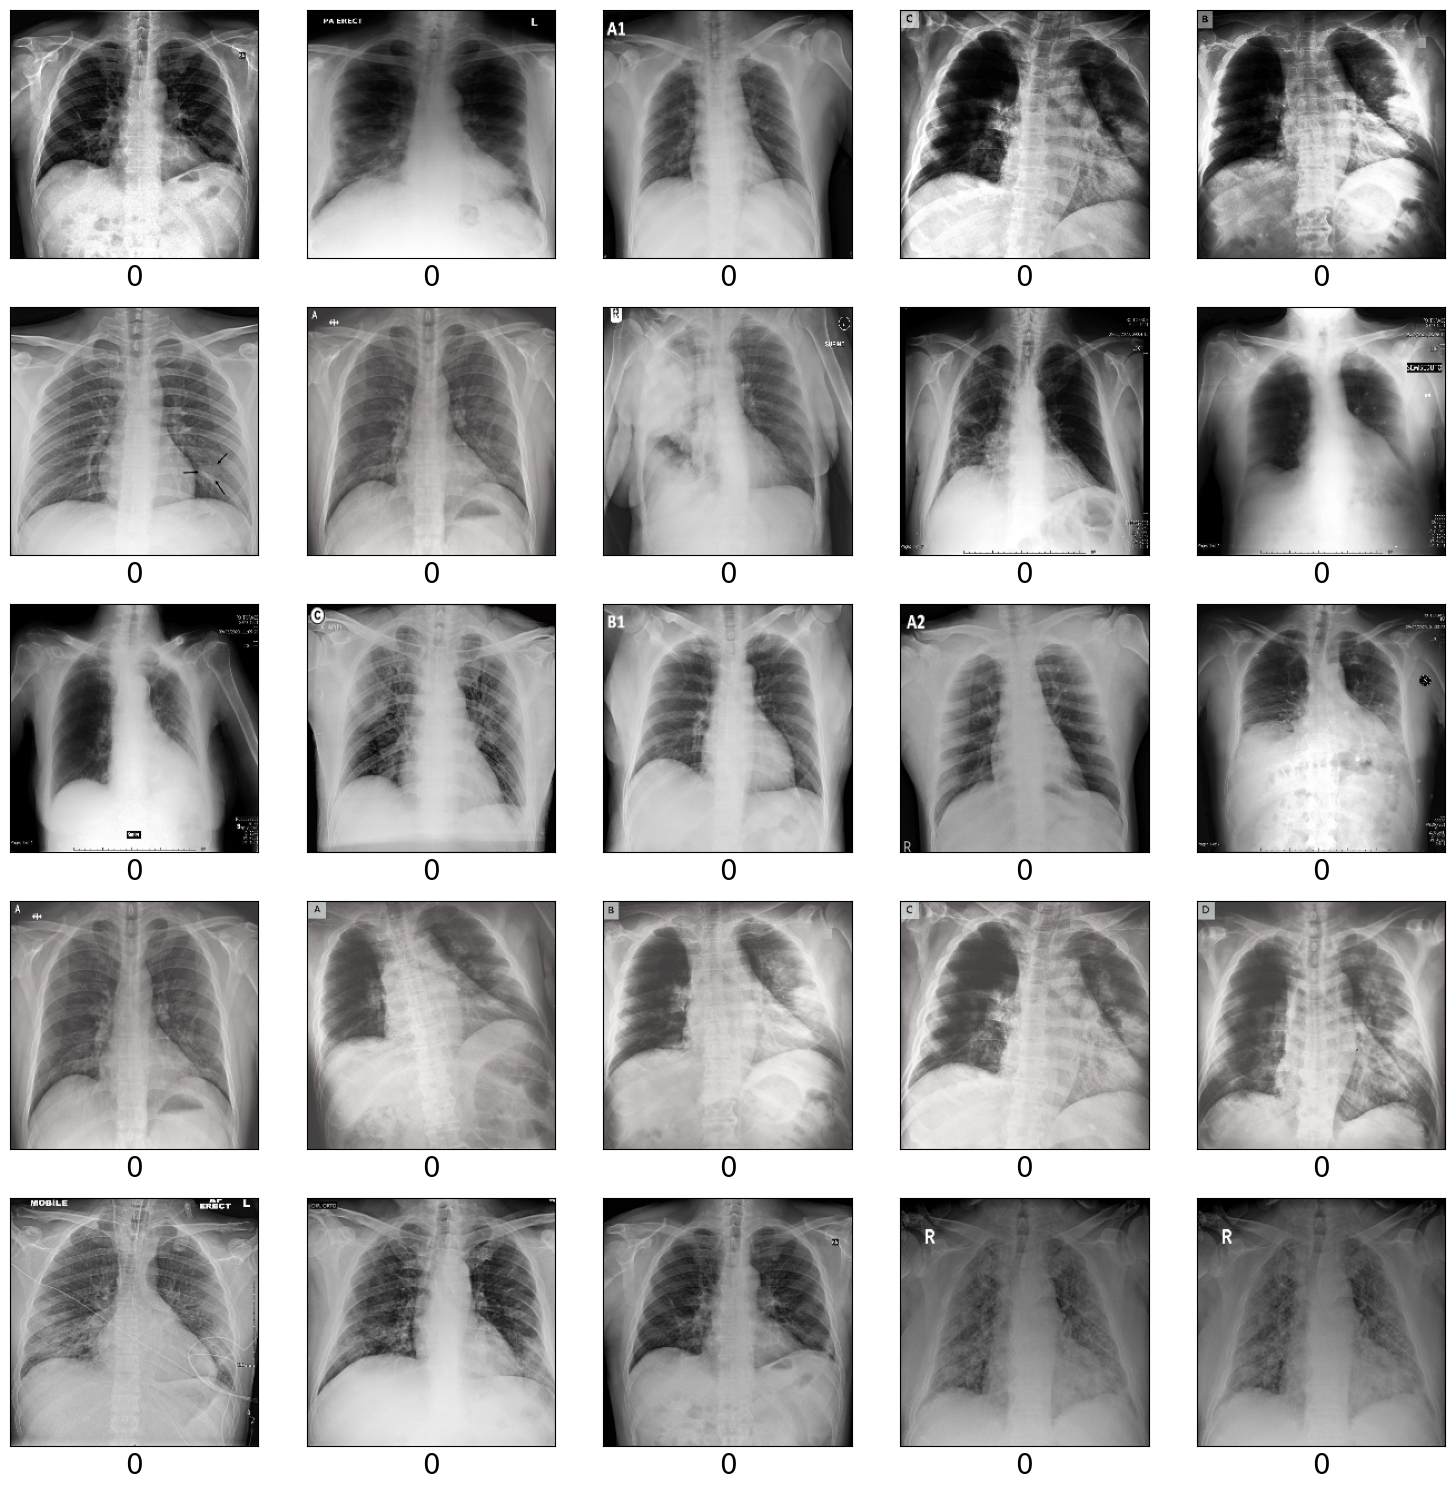

In [82]:
# Visualization of data 

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(y_test[i], fontsize=20)

plt.tight_layout()
plt.show()


In [83]:
# ResNet50 model tanser learning

resnet50 = ResNet50(include_top = False , input_shape = (224, 224, 3), weights='imagenet')

for layer in resnet50.layers:
    layer.trainable = False

In [84]:

# Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ES = EarlyStopping(
    monitor='val_loss',
    patience = 10,
    restore_best_weights=True,
    min_delta = 0.001,
    verbose = 0
)
model = Sequential([
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(factor=0.2),
    resnet50,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy', # sparse_categorical_crossentropy
    metrics = ['accuracy']
)


In [86]:
# Fitting the model

training = model.fit(
    train_set,
    callbacks=[ES],
    steps_per_epoch = 7 , # The number of steps (batches) to process in each epoch. It's set to 7 in your example.
    epochs = 2, # 100
    validation_data = val_set
)
# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=30,
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // batch_size,
#     callbacks=[early_stopping]
# )

Epoch 1/2
7/7 [==============================] - 40s 5s/step - loss: 1.3263 - accuracy: 0.4478 - val_loss: 1.2972 - val_accuracy: 0.4600
Epoch 2/2
7/7 [==============================] - 32s 5s/step - loss: 1.0432 - accuracy: 0.4776 - val_loss: 0.9511 - val_accuracy: 0.5600


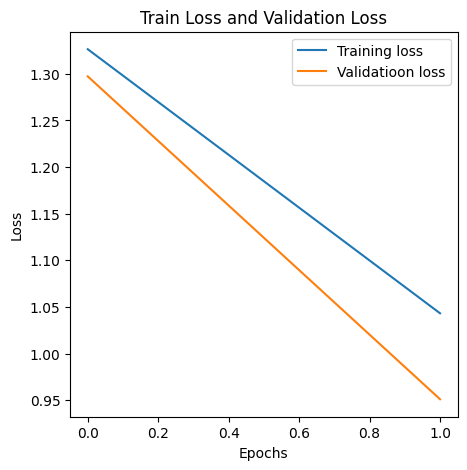

In [87]:
# Plotting the training loss (loss) and validation loss (val_loss)

plt.figure(figsize = (5, 5))
plt.plot(training.history["loss"], label = "Training loss")
plt.plot(training.history["val_loss"], label = "Validation loss")
plt.title("Train Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"], loc = "upper right")
plt.show()

In [88]:
# prediction

pred = model.predict(test_set)
final_pred = np.argmax(pred, axis = 1)

3/3 [==============================] - 9s 2s/step


In [89]:
final_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [90]:
# Now! We can proceed with the development of the model.

model2 = Sequential(
    [
        Input(shape = (224, 224, 3)),
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', data_format = None, 
               dilation_rate = (1, 1), groups = 1, activation = "relu", use_bias = True, 
               kernel_initializer = "glorot_uniform", bias_initializer = "zeros", 
               kernel_regularizer = None, bias_regularizer = None, activity_regularizer = None, 
               kernel_constraint = None, bias_constraint = None),
        MaxPooling2D(pool_size = (2, 2), strides = None, padding = "valid", data_format = None),
        Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = "valid", activation = "relu"),
        MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = "valid", data_format = None),
        Flatten(),
        Dropout(0.5),
        Dense(units = 3, activation = "softmax", use_bias = True, kernel_initializer = "glorot_uniform", 
              bias_initializer = "zeros", kernel_regularizer = None, bias_regularizer = None,
              activity_regularizer = None, kernel_constraint = None, bias_constraint = None)
    ]
)

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 108, 108, 32)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 373248)            0         
                                                                 
 dropout (Dropout)           (None, 373248)           

In [91]:

# model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "mse"])

# history = model.fit(x = x_train, y = y_train, 
#                     epochs = 5, validation_split = 0.1, 
#                     validation_data = (x_test, y_test), 
#                     shuffle = True)


# Fitting the model

# history = model.fit_generator(
#     train_set,
#     callbacks=[ES],
#     steps_per_epoch = 7 ,
#     epochs = 5, # 100
#     validation_data = val_set
# )


# ES = EarlyStopping(
#     patience = 10,
#     min_delta = 0.001,
#     verbose = 0
# )
# model = Sequential([
#     layers.RandomFlip(mode='horizontal'),
#     layers.RandomRotation(factor=0.2),
#     resnet50,
#     layers.Flatten(),
#     layers.Dense(3, activation='softmax')
# ])
model2.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy', # sparse_categorical_crossentropy
    metrics = ['accuracy']
)

In [92]:
# Fitting the model

training2 = model2.fit(
    train_set,
    callbacks=[ES],
    steps_per_epoch = 7 ,
    epochs = 2, # 100
    validation_data = val_set
)

Epoch 1/2
7/7 [==============================] - 17s 2s/step - loss: 4.7880 - accuracy: 0.3781 - val_loss: 1.4513 - val_accuracy: 0.4400
Epoch 2/2
7/7 [==============================] - 14s 2s/step - loss: 0.7762 - accuracy: 0.7413 - val_loss: 0.8571 - val_accuracy: 0.5800


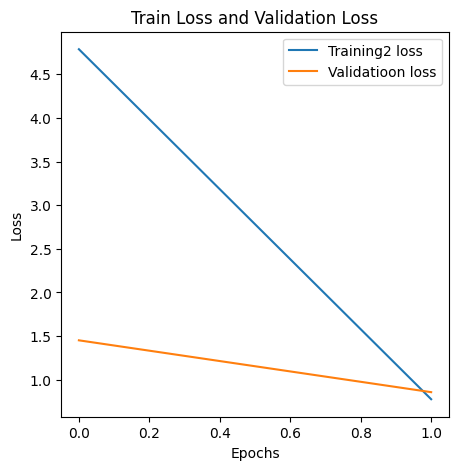

In [93]:
# Plotting the training loss (loss) and validation loss (val_loss)

plt.figure(figsize = (5, 5))
plt.plot(training2.history["loss"], label = "Training loss")
plt.plot(training2.history["val_loss"], label = "Validation loss")
plt.title("Train Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training2 loss", "Validatioon loss"], loc = "upper right")
plt.show()

In [117]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_set, verbose=1)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3/3 [==============================] - 8s 2s/step - loss: 0.8961 - accuracy: 0.6061
Test Loss: 0.8960551619529724
Test Accuracy: 0.6060606241226196


In [118]:
# Evaluate the model on the test data
loss, accuracy = model2.evaluate(test_set, verbose=1)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3/3 [==============================] - 2s 313ms/step - loss: 1.0522 - accuracy: 0.4848
Test Loss: 1.0521844625473022
Test Accuracy: 0.4848484992980957


In [95]:
from sklearn.metrics import classification_report

# Generate predictions from the model
predictions = model.predict(test_set)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test generator
true_labels = test_set.classes

# Calculate the classification report
print("Classification Report")
report = classification_report(true_labels, predicted_labels, target_names=test_set.class_indices.keys(), zero_division = 0)

print(report)

3/3 [==============================] - 8s 2s/step
Classification Report
                 precision    recall  f1-score   support

          Covid       0.39      0.65      0.49        26
         Normal       0.27      0.30      0.29        20
Viral Pneumonia       0.00      0.00      0.00        20

       accuracy                           0.35        66
      macro avg       0.22      0.32      0.26        66
   weighted avg       0.23      0.35      0.28        66



3/3 [==============================] - 8s 2s/step


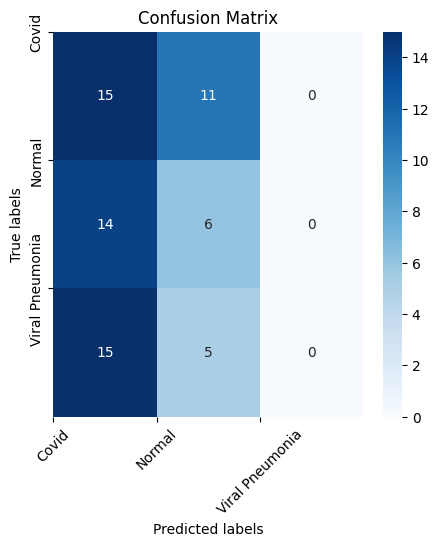

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have model predictions and true labels
X_test_predictions = model.predict(test_set)
y_test_pred_labels = np.argmax(X_test_predictions, axis=1)
y_test_true_labels = test_set.classes

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.xticks(ticks=np.arange(len(test_set.class_indices)), labels=test_set.class_indices.keys(), rotation=45)
plt.yticks(ticks=np.arange(len(test_set.class_indices)), labels=test_set.class_indices.keys())
plt.show()
